In [1]:
%matplotlib inline

In [2]:
import pandas as pd 

import json

In [3]:
actor_name_map = {}
movie_actor_map = {}
actor_genre_map = {}

with open('imdb_movies_2000to2022.prolific.json') as file: 
    for line in file:
        
        #Go through each movie on the line and parse the json
        this_movie = json.loads(line)
        
        #add all actors to the id-name map
        for actor_id,actor_name in this_movie['actors']:
            actor_name_map[actor_id] = actor_name 
            
        #for each actor, add this movie's genre to that actor's list
        for actor_id, actor_name in this_movie['actors']:
            this_actors_genres = actor_genre_map.get(actor_id, {})
            
            for g in this_movie['genres']:
                this_actors_genres[g] = this_actors_genres.get(g, 0) + 1
                
            actor_genre_map[actor_id] = this_actors_genres
            
        movie_actor_map[this_movie["imdb_id"]] = ({
            "movie": this_movie["title"],
            "actors": set([item[0] for item in this_movie['actors']]),
            "genres": this_movie["genres"]
        })

In [4]:
index = actor_genre_map.keys()

rows = [actor_genre_map[k] for k in index]

df = pd.DataFrame(rows, index=index)

df = df.fillna(0)

df

,Comedy,Fantasy,Romance,Drama,Mystery,Thriller,Action,Biography,Crime,War,...,Horror,Documentary,Sport,News,Family,Music,,Western,Short,Reality-TV
nm0000212,7.0,1.0,6.0,6.0,1.0,2.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0413168,7.0,3.0,5.0,12.0,5.0,2.0,14.0,4.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0000630,8.0,2.0,6.0,14.0,2.0,3.0,4.0,5.0,1.0,1.0,...,3.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0005227,10.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
nm0864851,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nm9504284,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm10592896,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm7216750,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0936300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
import matplotlib.pyplot as plt

#For values of k from 2 to 32, fit k-means models and calculate silhouette scores
scores = []
for k in range(2,32):
    labels = KMeans(n_clusters=k).fit_predict(df)
    score = silhouette_score(df, labels)
    scores.append(score)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-p

In [7]:
#Find the elbow point
optimal_k = 10


In [8]:
#Fit the k-means model usiing optimal_k

kmeans_optimal = KMeans(n_clusters=optimal_k).fit_predict(df)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
import numpy as np 

#Add the cluster labels as a column in the dataframe
df['cluster'] = kmeans_optimal 

#Display cluster samples
for cluster, actors in df.groupby('cluster'):
    print("Cluster:", cluster, "Size:", actors.shape[0])
    
    #Get a random sample of 5 actors from this cluster
    for actor_id in actors.sample(5).index:
        print(f"\t {actor_id} {actor_name_map[actor_id]}")

Cluster: 0 Size: 1926
	 nm0005148 Delroy Lindo
	 nm2796745 Adam Devine
	 nm1854664 Jermaine Fowler
	 nm0580886 Lee Meriwether
	 nm0471036 Kristin Kreuk
Cluster: 1 Size: 15269
	 nm0309605 Michael Phenicie
	 nm5279413 Paul DuBois
	 nm1189253 Lori Enterline
	 nm5682160 S.V. Krishna Shankar
	 nm1674912 Skyler Caleb
Cluster: 2 Size: 233
	 nm1083271 Megan Fox
	 nm0900266 Vivek
	 nm0597388 Jason Momoa
	 nm1121870 Mahesh Babu
	 nm0942482 Jeffrey Wright
Cluster: 3 Size: 743
	 nm0000327 Lacey Chabert
	 nm0933727 Lambert Wilson
	 nm1494168 Angela Sarafyan
	 nm0924684 David A.R. White
	 nm2197298 Katrina Bowden
Cluster: 4 Size: 237
	 nm0002006 Thomas Haden Church
	 nm1950086 Greta Gerwig
	 nm0240381 Hilary Duff
	 nm1187181 Lynn Chen
	 nm1297015 Emma Stone
Cluster: 5 Size: 135
	 nm0001062 Jeffrey Combs
	 nm1395771 Lucas Till
	 nm1519500 Keith Collins
	 nm0001643 Linnea Quigley
	 nm3046228 Billy Blair
Cluster: 6 Size: 88
	 nm0202966 Keith David
	 nm0000160 Ethan Hawke
	 nm0001602 Guy Pearce
	 nm1303

Queston2

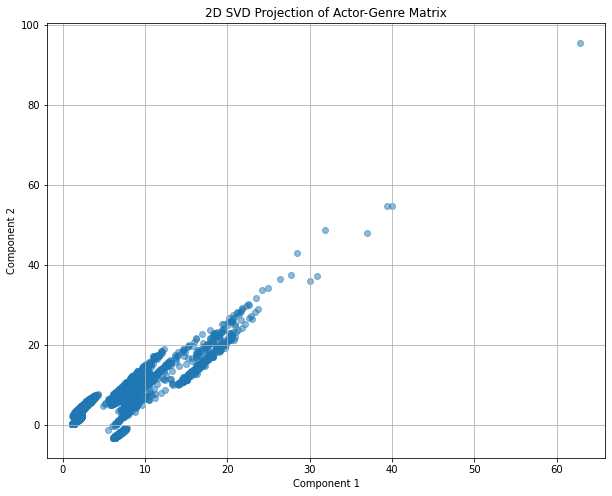

In [10]:
from sklearn.decomposition import TruncatedSVD 

#Use SVD to project data into 2 dimensions
svd = TruncatedSVD(n_components=2)
reduced_data = svd.fit_transform(df)

#Scatter plot the 2D projection
plt.figure(figsize=(10,8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D SVD Projection of Actor-Genre Matrix')
plt.grid(True)
plt.show()